In [1]:
import numpy as np
import cv2
from PIL import Image
import skimage
import matplotlib.pyplot as plt

(400, 400)


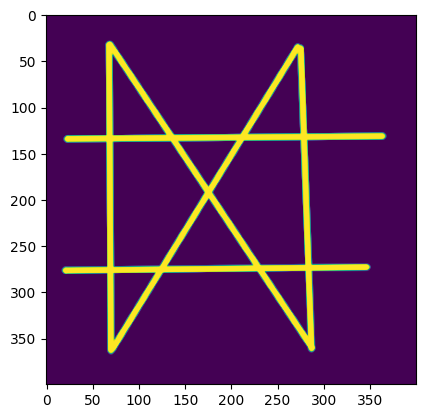

In [7]:
image = cv2.imread("../images/hough_line.jpg", flags=0)
print(image.shape)
plt.imshow(image)

# 霍夫线检测

## HoughLines 标准的霍夫变换,返回极坐标空间

一般情况是有经验的开发者使用，需要自己反变换到平面空间

In [8]:
hl = cv2.HoughLines(
    image=image,
    rho=1,              # 生成极坐标时候的像素扫描步长
    theta=np.pi / 180,  # 生成极坐标时候的角度步长，一般取值 pi/180
    threshold=150,      # 阈值，只有获得足够交点的极坐标点才被看成是直线
    srn=0,              # 是否应用多尺度的霍夫变换，如果不是设置0表示经典霍夫变换
    stn=0,              # 是否应用多尺度的霍夫变换，如果不是设置0表示经典霍夫变换
    min_theta=0,        # 表示角度扫描范围 0 ~180之间， 默认即可
    max_theta=np.pi,
)
print(hl.shape)
print(hl[0])

(69, 1, 2)
[[252.           0.55850536]]


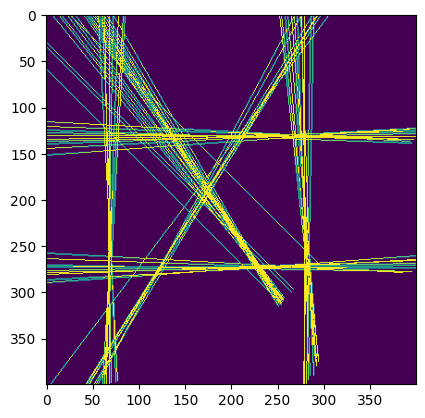

In [9]:
height, width = image.shape
detect = np.zeros(image.shape)
for h in hl:
    rho = h[0, 0]   # 极坐标中的r长度
    theta = h[0, 1] # 极坐标中的角度
    a = np.cos(theta)
    b = np.sin(theta)
    x = a * rho
    y = b * rho

    x1 = (x + width * (-b)).astype(np.int32)
    x2 = (x - width * (-b)).astype(np.int32)
    y1 = (y + height * a).astype(np.int32)
    y2 = (y - height * a).astype(np.int32)

    cv2.line(
        img=detect,
        pt1=(x1, y1),
        pt2=(x2, y2),
        color=255,
    )
plt.imshow(detect)

## HoughLinesP 输出是直线的两个点（x0,y0,x1,y1)

(400, 400)


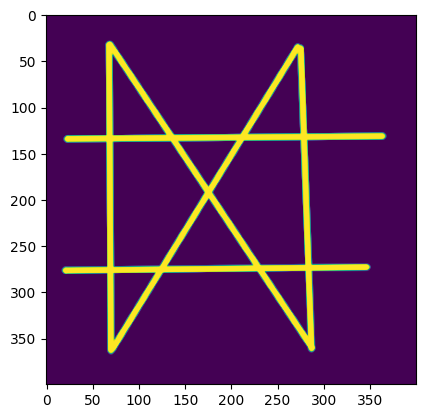

In [2]:
image1 = cv2.imread("../images/hough_line.jpg", flags=0)
print(image1.shape)
plt.imshow(image1)

In [3]:
hlp = cv2.HoughLinesP(
    image=image1,
    rho=1,              # 生成极坐标时候的像素扫描步长
    theta=np.pi / 180,  # 生成极坐标时候的角度步长，一般取值 pi/180
    threshold=150,      # 阈值，只有获得足够交点的极坐标点才被看成是直线
)
print(hlp.shape)

(119, 1, 4)


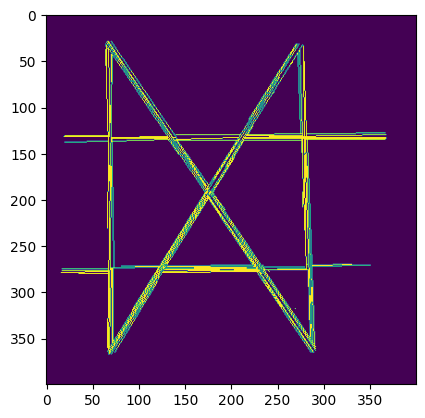

In [6]:
detect1 = np.zeros(image1.shape)
for h in hlp:
    x1 = h[0, 0]
    y1 = h[0, 1]
    x2 = h[0, 2]
    y2 = h[0, 3]

    cv2.line(
        img=detect1,
        pt1=(x1, y1),
        pt2=(x2, y2),
        color=255,
    )
plt.imshow(detect1)

# 霍夫圆检测

因为霍夫圆检测对噪声比较敏感，所以首先要对图像做中值滤波。

基于效率考虑，Opencv中实现的霍夫变换圆检测是基于图像梯度的实现，分为两步：

1. 检测边缘，发现可能的圆心
2. 基于第一步的基础上从候选圆心开始计算最佳半径大小

(400, 400)


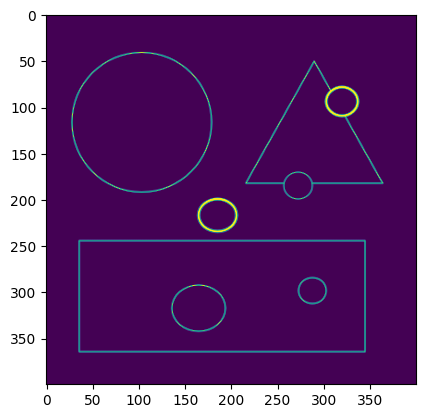

In [12]:
image2 = cv2.imread("../images/hough_circle.jpg", flags=0)
print(image2.shape)
plt.imshow(image2)

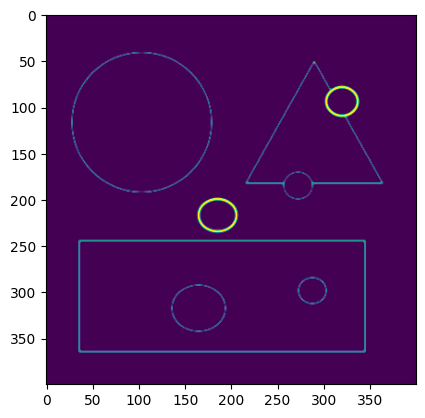

In [21]:
image_blur = cv2.medianBlur(
    src=image2,
    ksize=3
)
plt.imshow(image_blur)

In [22]:
cs = cv2.HoughCircles(
    image=image_blur,
    method=cv2.HOUGH_GRADIENT,  # 方法 - HOUGH_GRADIENT
    dp=1,
    minDist=10,                 # 10 最短距离-可以分辨是两个圆的，否则认为是同心圆- src_gray.rows/8
    circles=10,
    param1=100,                 # canny edge detection low threshold
    param2=33,                  # 中心点累加器阈值 – 候选圆心
    minRadius=5,                # 最小半径
    maxRadius=200,              # 最大半径
)
print(cs.shape)

(1, 8, 3)


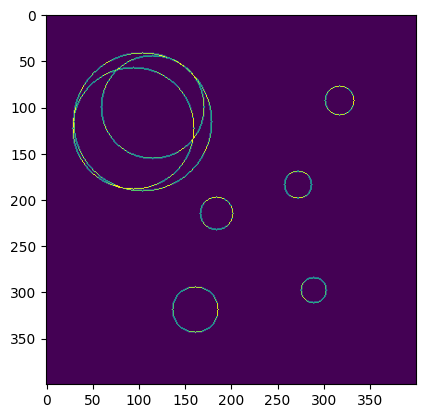

In [23]:
detect2 = np.zeros(image2.shape)
for c in cs[0]:
    x = int(c[0])
    y = int(c[1])
    radius=int(c[2])

    cv2.circle(
        img=detect2,
        center=(x, y),
        radius=radius,
        color=255,
    )
plt.imshow(detect2)